# <center>Exploratory Data Analysis - IPL         </center>

## Name- Alok Kumar Sahoo



## TSF - Task 5



### Divide this analysis into 3 categories

#### <font color=red> - Analysis of IPL team</font>
#### <font color=blue> - Analysis of IPL players </font>
#### <font color=green> - Analysis of IPL matches</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
print("Modules are imported")

Modules are imported


In [2]:
import os

In [3]:
os.chdir('Documents')

In [4]:
df_matches=pd.read_csv('matches.csv')

In [5]:
df_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [6]:
df_deliveries=pd.read_csv('ball_by_ball.csv')

In [7]:
df_deliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


## Lets start the data preprocessing on first dataset

In [8]:
df_matches.shape

(950, 20)

#### Dataset  contains 950 IPL matches data with 20 columns

In [9]:
df_matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [10]:
del df_matches['Umpire1']

In [11]:
del df_matches['Umpire2']

In [12]:
del df_matches['method']

In [13]:
del df_matches['Margin']

In [14]:
df_matches.shape

(950, 16)

In [15]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               950 non-null    int64 
 1   City             899 non-null    object
 2   Date             950 non-null    object
 3   Season           950 non-null    object
 4   MatchNumber      950 non-null    object
 5   Team1            950 non-null    object
 6   Team2            950 non-null    object
 7   Venue            950 non-null    object
 8   TossWinner       950 non-null    object
 9   TossDecision     950 non-null    object
 10  SuperOver        946 non-null    object
 11  WinningTeam      946 non-null    object
 12  WonBy            950 non-null    object
 13  Player_of_Match  946 non-null    object
 14  Team1Players     950 non-null    object
 15  Team2Players     950 non-null    object
dtypes: int64(1), object(15)
memory usage: 118.9+ KB


In [16]:
df_matches.isna().sum()

ID                  0
City               51
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           4
WinningTeam         4
WonBy               0
Player_of_Match     4
Team1Players        0
Team2Players        0
dtype: int64

In [17]:
df_matches[df_matches.City.isnull()][['City','Date']]

,City,Date
134,NaN,2020-11-10
137,NaN,2020-11-05
138,NaN,2020-11-03
140,NaN,2020-11-01
142,NaN,2020-10-31
143,NaN,2020-10-31
145,NaN,2020-10-29
147,NaN,2020-10-27
148,NaN,2020-10-26
150,NaN,2020-10-25


In [18]:
df_matches.City=df_matches.City.fillna('Dubai/UAE')
df_matches.isna().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          4
WinningTeam        4
WonBy              0
Player_of_Match    4
Team1Players       0
Team2Players       0
dtype: int64

In [19]:
df_deliveries.shape

(225954, 17)

In [20]:
df_deliveries.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [21]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [22]:
df_deliveries.isna().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [23]:
del df_deliveries['extra_type']

In [24]:
del df_deliveries['player_out']

In [25]:
del df_deliveries['kind']

In [26]:
del df_deliveries['fielders_involved']

In [27]:
df_deliveries.shape

(225954, 13)

In [28]:
df_deliveries.isna().sum()

ID                  0
innings             0
overs               0
ballnumber          0
batter              0
bowler              0
non-striker         0
batsman_run         0
extras_run          0
total_run           0
non_boundary        0
isWicketDelivery    0
BattingTeam         0
dtype: int64

## <center>Analysis Of IPL Team

In [29]:
teams=df_matches['WinningTeam'].value_counts()
teams


Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: WinningTeam, dtype: int64

#### To fix the Rising Pune Supergiants spelling

In [30]:
df_matches['WinningTeam'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

In [31]:
teams=df_matches['WinningTeam'].value_counts()
teams

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Rising Pune Supergiants         15
Punjab Kings                    13
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

In [32]:
len(teams)

17

#### There are 17 teams participated in the IPL so far

####  <center>  *************

### <center> Teams with most number of wins

In [33]:
teams

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Rising Pune Supergiants         15
Punjab Kings                    13
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

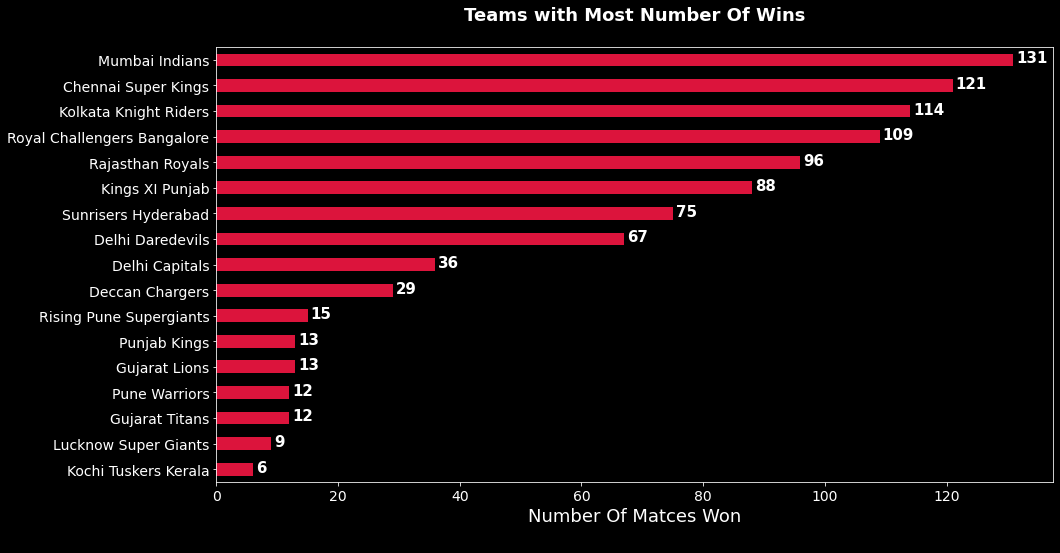

In [66]:
teams=teams.plot.barh(figsize=(15,8),color='crimson',fontsize=14)
plt.style.use('dark_background')

teams.set_title('Teams with Most Number Of Wins\n',fontsize=18,fontweight='bold')
teams.set_xlabel('Number Of Matces Won\n',fontsize=18,fontweight=5)
teams.invert_yaxis()

for i in teams.patches:
    teams.text(i.get_width()+0.5,i.get_y()+.35,i.get_width(),fontsize=15,fontweight='bold')

### As we see Mumbai Indians has the most number of wins in IPL history till now. Followed with CSK achieving 121 wins

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
sns.color_palette("Paired")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'

## <center>Team with most IPL title

In [35]:
winners=df_matches[['Season','WinningTeam']]

In [36]:
team_with_most_title={}
for i in sorted(winners.Season.unique()):
    team_with_most_title[i]=winners[winners.Season == i]['WinningTeam'].tail(1).values[0]
season_winner=pd.Series(team_with_most_title)
season_winner=pd.DataFrame(season_winner,columns=['season_winner'])
    

In [37]:
season_winner

,season_winner
2007/08,Kolkata Knight Riders
2009,Mumbai Indians
2009/10,Kolkata Knight Riders
2011,Chennai Super Kings
2012,Mumbai Indians
2013,Kolkata Knight Riders
2014,Kolkata Knight Riders
2015,Kolkata Knight Riders
2016,Rising Pune Supergiants
2017,Sunrisers Hyderabad


## <center>**Analysis of IPL players**

In [41]:
most_player_of_match=df_matches['Player_of_Match'].value_counts()[0:10]
most_player_of_match

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

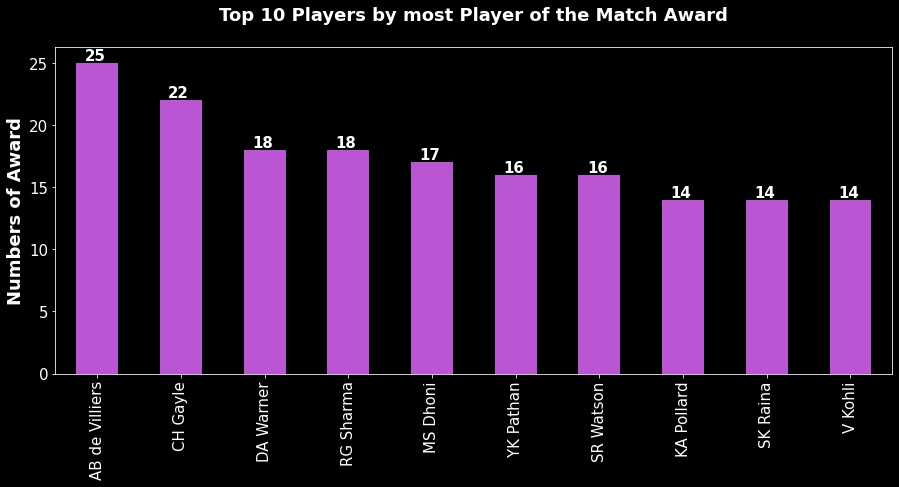

In [42]:
most_player_of_match=most_player_of_match.plot(kind='bar',figsize=(15,6),color='mediumorchid',fontsize=15)
plt.style.use('dark_background')
most_player_of_match.set_title('Top 10 Players by most Player of the Match Award\n',fontsize=18,fontweight='bold')
most_player_of_match.set_ylabel('Numbers of Award',fontsize=18,fontweight='bold')

for i in most_player_of_match.patches:
    most_player_of_match.text(i.get_x()+.10,i.get_height()+.2,i.get_height(),fontsize=15,fontweight='bold',color='white')

### Top 15 player with most runs in the IPL history

In [52]:
top15_run_getter=df_deliveries.groupby('batter')['batsman_run'].sum().sort_values(ascending=False)[0:15]
top15_run_getter

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
G Gambhir         4217
AT Rayudu         4190
AM Rahane         4074
KL Rahul          3895
SR Watson         3880
Name: batsman_run, dtype: int64

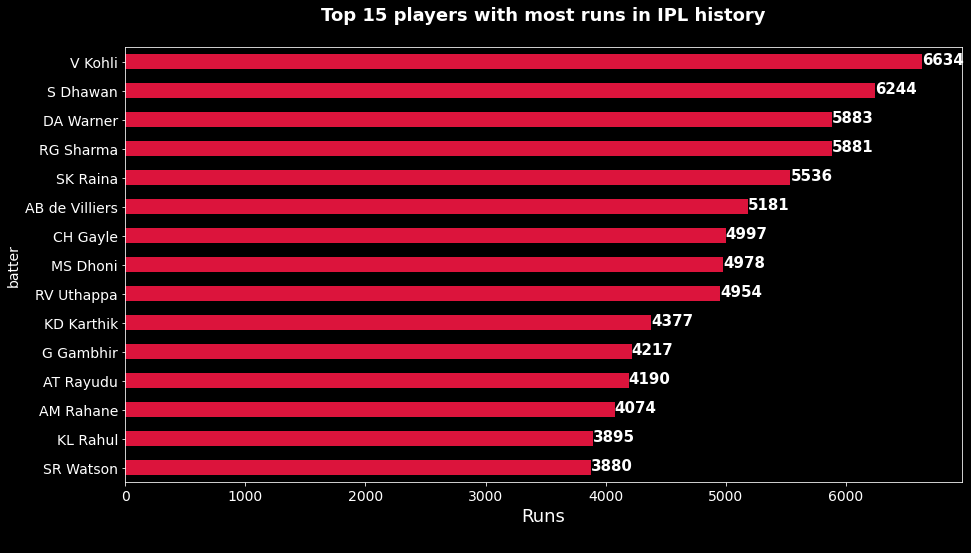

In [53]:
top15_run_getter=top15_run_getter.plot.barh(figsize=(15,8),color='crimson',fontsize=14)
plt.style.use('dark_background')

top15_run_getter.set_title('Top 15 players with most runs in IPL history\n',fontsize=18,fontweight='bold')
top15_run_getter.set_xlabel('Runs\n',fontsize=18,fontweight=5)
top15_run_getter.invert_yaxis()

for i in top15_run_getter.patches:
    top15_run_getter.text(i.get_width()+0.5,i.get_y()+.35,i.get_width(),fontsize=15,fontweight='bold')

## <center>Comparison of top3 run scorer per IPL season

### 1.Virat Kohli
### 2.Sikhar Dhawan
### 3.David Warner

In [55]:
df=pd.merge(df_matches,df_deliveries,left_on='ID',right_on='ID')

In [57]:
vkohli=df[df['batter']=='V Kohli']
vkohli=vkohli.groupby('Season')['batsman_run'].sum()
vkohli

Season
2007/08    165
2009       246
2009/10    307
2011       557
2012       364
2013       639
2014       359
2015       505
2016       973
2017       308
2018       530
2019       464
2020/21    471
2021       405
2022       341
Name: batsman_run, dtype: int64

In [59]:
sdhawan=df[df['batter']=='S Dhawan']
sdhawan=sdhawan.groupby('Season')['batsman_run'].sum()
sdhawan

Season
2007/08    340
2009        40
2009/10    191
2011       400
2012       569
2013       311
2014       377
2015       353
2016       501
2017       479
2018       497
2019       521
2020/21    618
2021       587
2022       460
Name: batsman_run, dtype: int64

In [60]:
dwarner=df[df['batter']=='DA Warner']
dwarner=dwarner.groupby('Season')['batsman_run'].sum()
dwarner

Season
2009       163
2009/10    282
2011       324
2012       256
2013       410
2014       528
2015       562
2016       848
2017       641
2019       692
2020/21    548
2021       197
2022       432
Name: batsman_run, dtype: int64

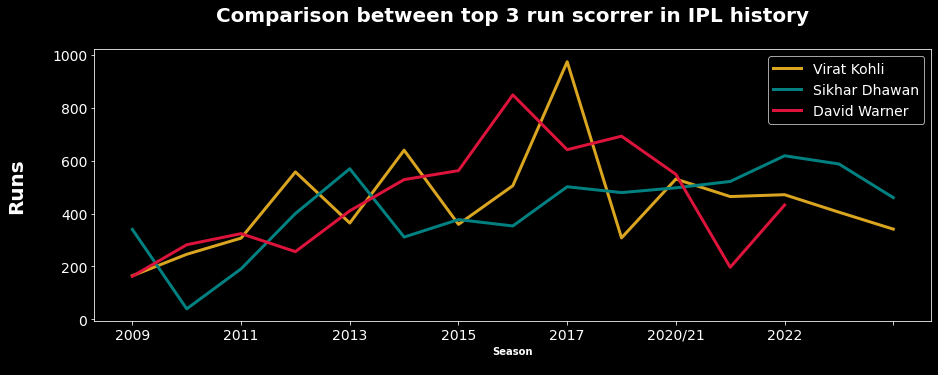

In [61]:
vkohli.plot(kind='line',linewidth=3,figsize=(15,5),color='goldenrod',label='Virat Kohli')
sdhawan.plot(kind='line',linewidth=3,figsize=(15,5),color='teal',label='Sikhar Dhawan')
dwarner.plot(kind='line',linewidth=3,figsize=(15,5),color='crimson',label='David Warner')

plt.title("Comparison between top 3 run scorrer in IPL history\n",fontsize=20,fontweight='bold')
plt.xlabel('Season\n',fontsize=10,fontweight='bold')
plt.ylabel('Runs\n',fontsize=20,fontweight='bold')
plt.legend()
plt.show()

## <center>Analysis Of IPL Matches

In [69]:
venue_city=df_matches.groupby('Venue')['City'].value_counts().sort_values(ascending=False)[:10]
venue_city

Venue                                       City      
Eden Gardens                                Kolkata       77
Wankhede Stadium                            Mumbai        73
M Chinnaswamy Stadium                       Bangalore     65
Feroz Shah Kotla                            Delhi         60
Rajiv Gandhi International Stadium, Uppal   Hyderabad     49
MA Chidambaram Stadium, Chepauk             Chennai       48
Sawai Mansingh Stadium                      Jaipur        47
Punjab Cricket Association Stadium, Mohali  Chandigarh    35
Dubai International Cricket Stadium         Dubai/UAE     33
Wankhede Stadium, Mumbai                    Mumbai        31
Name: City, dtype: int64

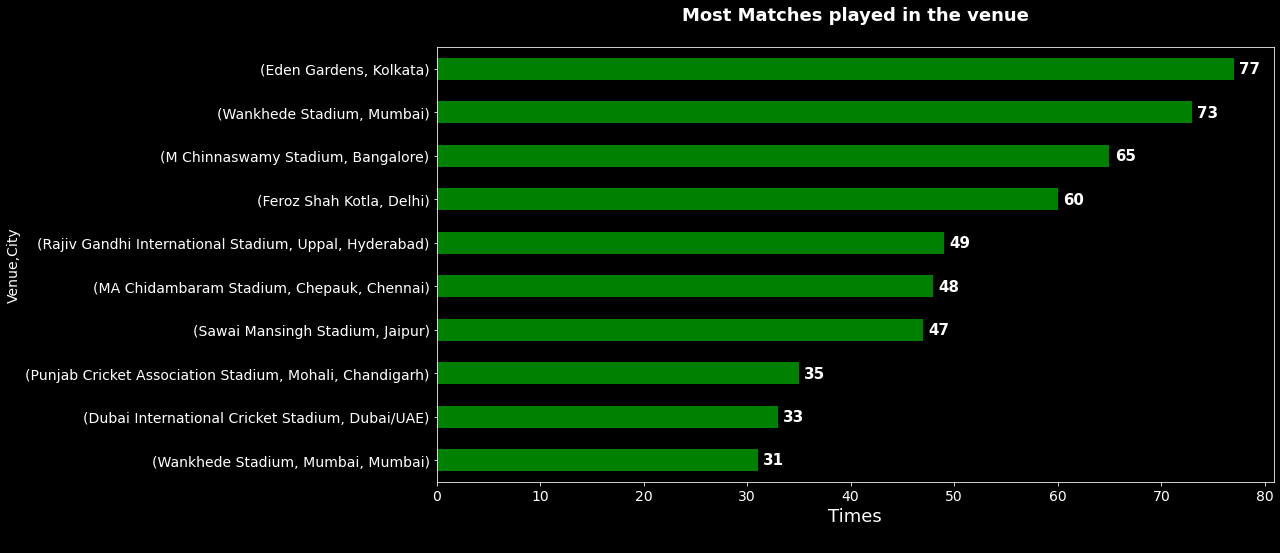

In [70]:
venue_city=venue_city.plot.barh(figsize=(15,8),color='green',fontsize=14)
plt.style.use('dark_background')

venue_city.set_title('Most Matches played in the venue\n',fontsize=18,fontweight='bold')
venue_city.set_xlabel('Times\n',fontsize=18,fontweight=5)
venue_city.invert_yaxis()

for i in venue_city.patches:
    venue_city.text(i.get_width()+0.5,i.get_y()+.35,i.get_width(),fontsize=15,fontweight='bold')

## Insights-:

#### 1.Mumbai Indians won maximum matches 131
#### 2.Mumbai Indians is the most successful team in IPL history
#### 3.AB Devilliers won the most player of the match award 25 times
#### 4.Virat Kohili is the most run scorer in the IPL history 6634
#### 5.Sikhar Dhawan is the most consistent and run scorer in the IPL history
#### 6.In Eden Gardens(Kolkata) most 77 matches are played 

## <center>THE END